In [159]:
from UTILS.functions import *
from UTILS.librerias import *

# PROYECTO DE MACHINE LEARNING: LA GRAN RENUNCIA

## RESUMEN

El objetivo del presente estudio es realizar un modelo de predicción sobre el abandono de puestos de trabajo en la empresa IBM para poner en práctica algunos de los conceptos aprendidos durante el bootcamp de Data Science en The Bridge.

Para ello, se ha elegido una base de datos de abandono de puestos de trabajo en IBM en los últimos años disponible en Kaggle y el objetivo es crear un modelo de predicción para que los equipos de Recursos Humanos puedan adelantarse a los casos de abandono y logren revertir la situación en tiempo.

Una tasa de abandono es una métrica utilizada para medir los empleados que dejan el trabajo y que no son reemplazados.A diferencia de rotación, el abandono se centra en la pérdida permanente o semipermanente de empleados y puestos a lo largo del tiempo y en cómo estas pérdidas pueden afectar a la empresa.

## 1. INTRODUCCIÓN

Establecer unos indicadores de desempeño, también conocidos como Key Performance Indicators (KPIs), de Recursos Humanos (RRHH) es clave para sacar el máximo partido al capital humano de las empresas y alcanzar los objetivos estratégicos de toda la organización. Dichos indicadores de RRHH miden la efectividad de los procesos asociados al reclutamiento, formación, desarrollo y gestión del talento. 

La tasa de abandono es uno de los principales KPIs de RRHH y mide cuántos empleados abandonan la empresa en un determinado período de tiempo. Una tasa de abandono elevada supone un coste para la empresa por la pérdida de conocimiento y la inversión en procesos de selección para cubrir el puesto libre. 

Según un estudio de InfoJobs sobre el abandono del empleo en España, un 27% de los empleados se plantea dejar su puesto de trabajo en 2022, principalmente por salud mental o condiciones económicas. Ese dato es todavía más alarmante si miramos a los Estados Unidos (EE. UU.), donde más del 40% de los empleados considera abandonar sus trabajos: una encuesta realizada por Microsoft en marzo de 2022 encontró que el 41% del personal estaba pensando en dejar sus trabajos.

Se le ha denominado la Gran Renuncia. Con 4,3 millones de personas que renunciaron a sus trabajos en mayo de 2022 en los EE. UU., la cantidad de renuncias sigue siendo prácticamente la misma que la del 2021 (cuando se pensaba que este año ya se ralentizaría un poco).
Después de dos años viviendo en una pandemia, los trabajadores están buscando una mayor conciliación del trabajo con la vida personal, más flexibilidad horaria y la posibilidad de hacer cada vez más teletrabajo. Las renuncias fueron impulsadas por el deseo de mejores beneficios y un trabajo más satisfactorio. Estos mismos factores siguen siendo importantes, pero ahora hay un ingrediente adicional: la inflación.

Para el presente trabajo de Machine Learning, se ha elegido una base de datos de empleados de la empresa norteamericana de tecnología IBM sobre el abandono, llamada ‘Attrition’ en la base de datos. El objetivo del proyecto es crear un modelo de Machine Learning para predecir los casos de abandono y que los equipos de RRHH puedan reaccionar con antelación para conseguir revertir esos casos y disminuir las tasas de abandono. 

Como punto de partida, el equipo de RRHH ya tiene algunas hipótesis sobre el tipo de empleados que estaría más propenso a renunciar a sus trabajos: empleados más jóvenes, solteros y que llevan menos de 2 años en la empresa. 

Primeramente se realizará un pequeño Análisis Exploratorio de los datos para entender la base de datos y confirmar si las suposiciones del equipo de RRHH pueden tener sentido. Después de analizar y tratar los datos, se procederá a la limpieza de los mismos para la creación de los modelos de Machine Learning.


## 2. DATOS DE REFERENCIA

Para la realización del presente proyecto de Machine Learning, se ha considerado una base de datos sobre la tasa de abandono en IBM disponible en Kaggle.

La base cruda cuenta con 1.470 filas y 33 columnas con diferentes informaciones sobre empleados de IBM en los Estados Unidos (EE.UU.). Toda la base de datos está en inglés y se ha optado por mantenerla en el idioma original.


Para poder analizar los datos, primeramente es necesario importarlos como un DataFrame a Pyhton y hacer algunas limpiezas como eliminar valores nulos.

### 2.1. Importamos el dataset

In [160]:
df = import_df(path_raw,'Attrition_raw.csv')

In [161]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

### 2.2. Limpiamos y tratamos los datos

- Valores nulos
- Transformamos datos necesarios

In [162]:
# Miramos si hay valores nulos

missing_data(df)

,Total,Percent
Unnamed: 32,1470,1.0
Date_of_termination,1470,1.0
TotalWorkingYears,0,0.0
Job_mode,0,0.0
Source_of_Hire,0,0.0
Work_accident,0,0.0
Absenteeism,0,0.0
Leaves,0,0.0
Mode_of_work,0,0.0
Status_of_leaving,0,0.0


In [163]:
# Eliminamos las columnas con valores nulos y la columna 'Date_of_hire', que vimos que no será necesaria y que además necesitaría ser tratada
df = df.drop(['Unnamed: 32', 'Date_of_termination', 'Date_of_Hire'], axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Gender                   1470 non-null   object
 6   JobInvolvement           1470 non-null   int64 
 7   JobLevel                 1470 non-null   int64 
 8   JobRole                  1470 non-null   object
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  NumCompaniesWorked       1470 non-null   int64 
 13  OverTime                 1470 non-null   object
 14  PercentSalaryHike        1470 non-null  

In [165]:
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Gender                        2
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
Higher_Education              4
Status_of_leaving             5
Mode_of_work                  2
Leaves                        6
Absenteeism                   4
Work_accident                 2
Source_of_Hire                4
Job_mode                      3
dtype: int64

## 3. Análisis Exploratorio de los Datos (EDA)

Después de relizar una primera limpieza de los datos, es posible empezar a analizarlos.

### 3.1. Distribución del dataset

Empezamos mirando las distribución del dataset que queremos analizar.

De primeras ya nos damos cuenta de que el dataset no es equilibrado, contamos con una tasa de abandono del 16%.

Por ahora, para realizar el EDA, dejaremos el dataset como está. Sin embargo, para realizar el modelo de clasificación volveremos a mirar esta distribución para entender si es necesario aplicar algún metodo de resampling en la muestra.

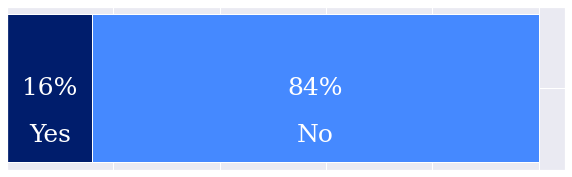

In [166]:
plot_distribution(df,'Attrition','Yes','No','attrition_dist')

### 3.2. Análisis Bivariante

El análisis bivariante permite estudiar la relación que existe entre dos variables.

En este caso, queremos identificar la relación que existe entre la variable 'Atrrition' con las otras variables del dataset. En otras palabras, queremos tener una primera visión de si algún factor podría tener alta correlación con el hecho de que un empleado abandone su puesto de trabajo.

Para ello, divideremos el análisis entre las variables categóricas y las variables numericas.

#### 3.2.1. Variables categoricas

Creamos una lista de las variables categoricas para analizar la relación de dichas variables con el hecho de que un empleado renuncie o no a su trabajo en IBM.

Podemos identificar que viajar con alta frecuencia, ser un 'Sales Representative', ser soltero/a y trabajar más horas de lo previsto (OverTime) pueden ser factores que lleven al abandono del puesto de trabajo. 

Sin embargo, otras variables como el género y el grado de estudios no parecen influir en la variables 'Attrition'.

In [167]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
print(f'El dataset cuenta con un total de {len(categorical)} variables que no son numericas')
categorical

El dataset cuenta con un total de 13 variables que no son numericas


['Attrition',
 'BusinessTravel',
 'Department',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Higher_Education',
 'Status_of_leaving',
 'Mode_of_work',
 'Work_accident',
 'Source_of_Hire',
 'Job_mode']

/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


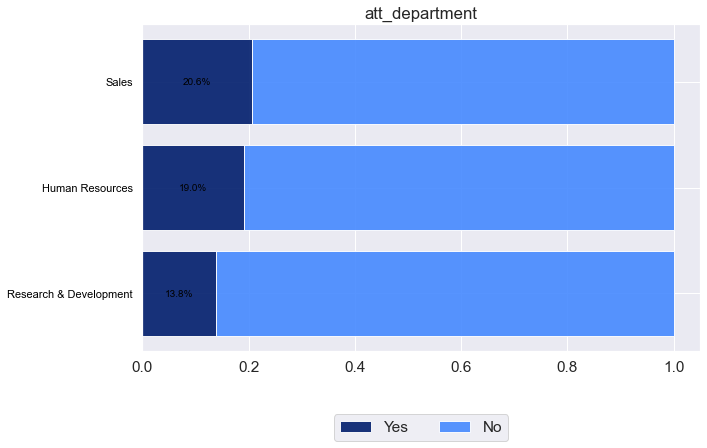

/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


None


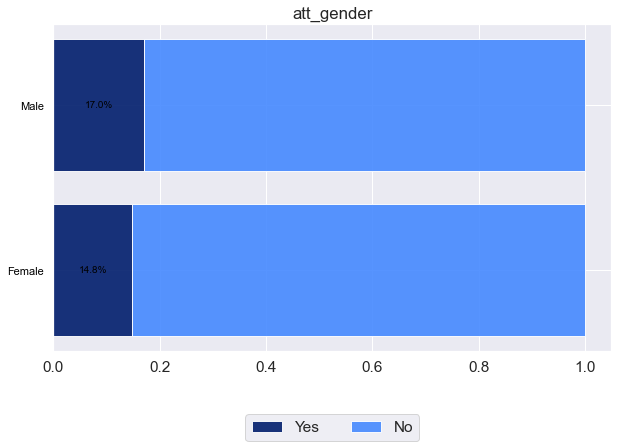

None


/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


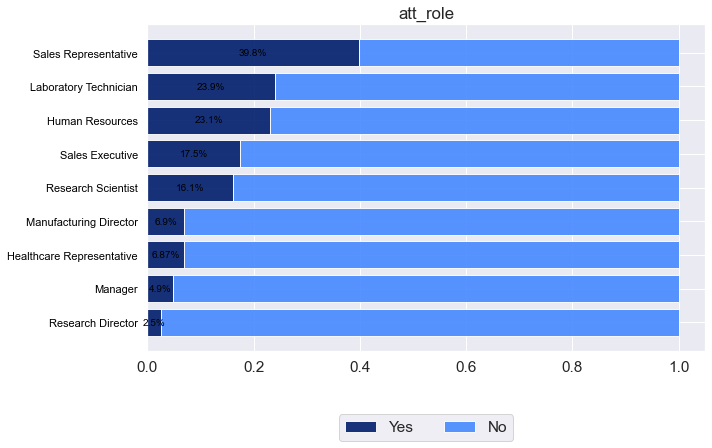

None


/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


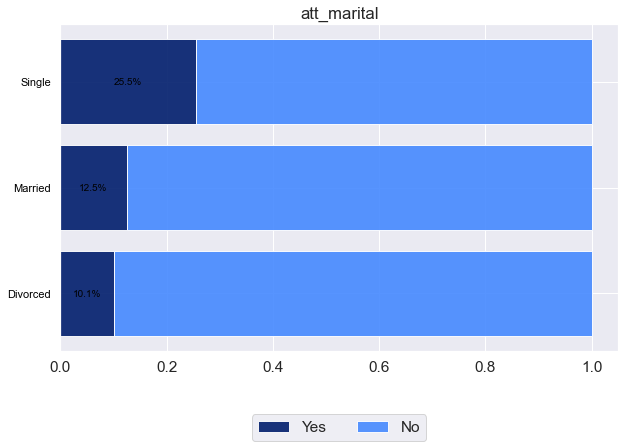

None


/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


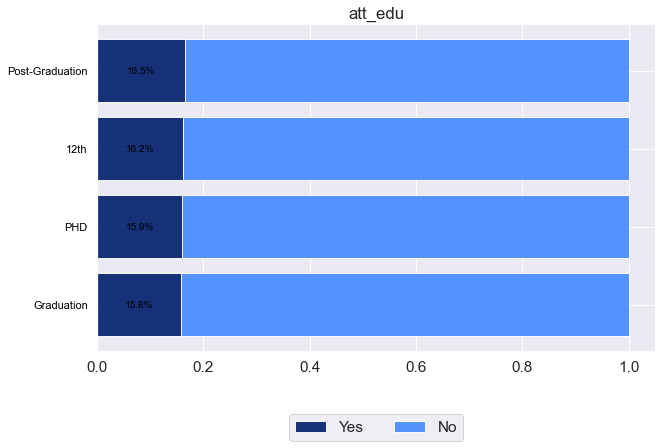

None


/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


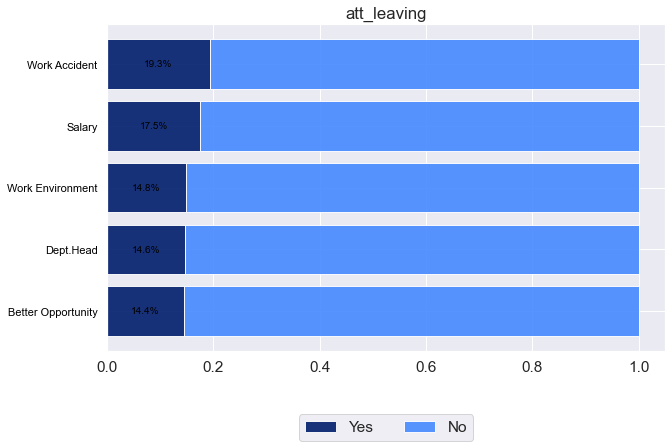

None


/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


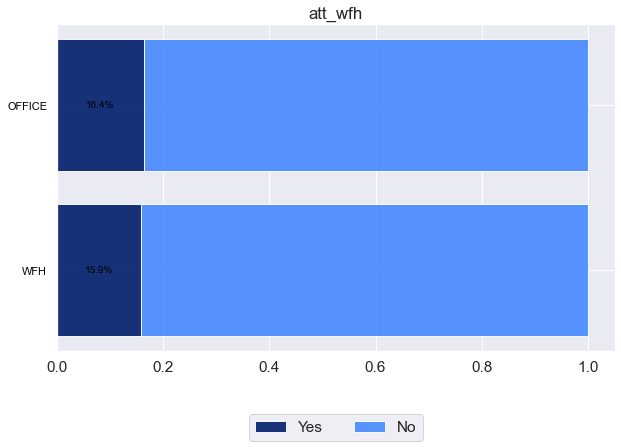

None


/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


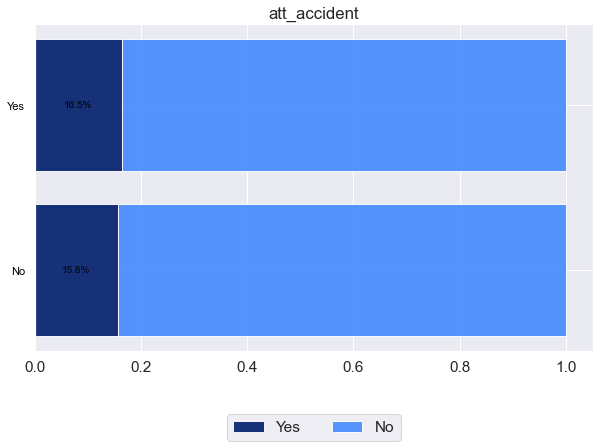

None


/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


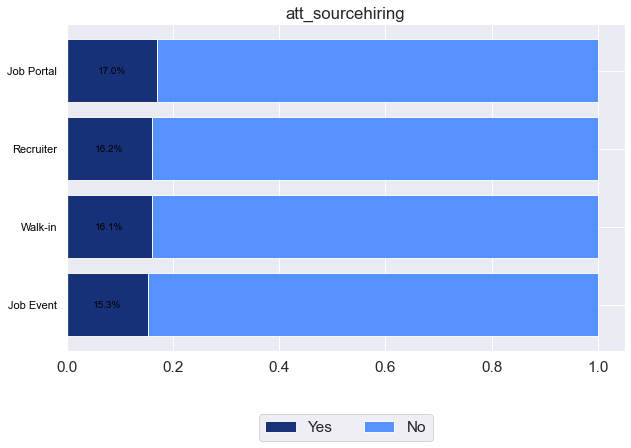

None


/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


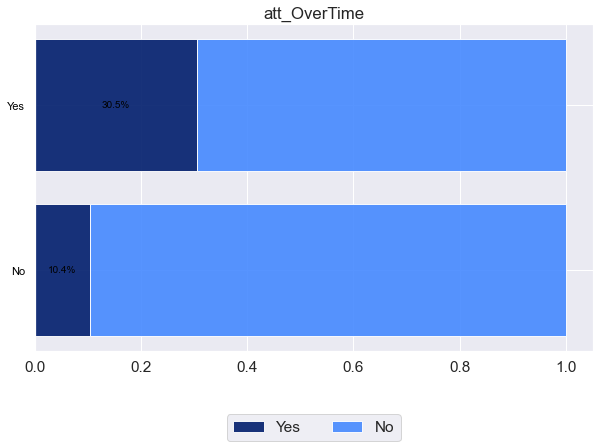

/Users/leticiamazarinmolina/Documents/THE_BRIDGE/ML/SRC/UTILS/functions.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


None


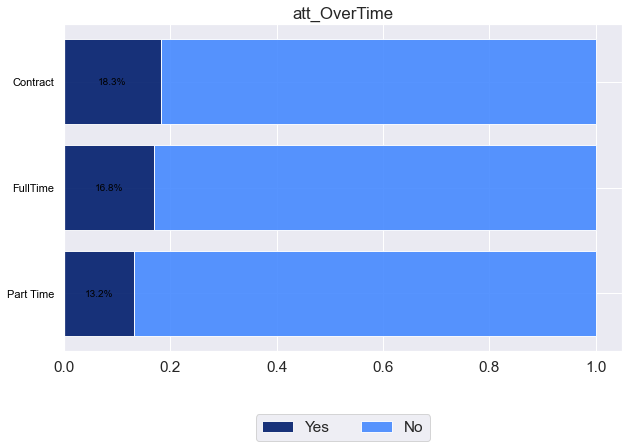

None


In [168]:
print(attrition_cat(df,'Department', 'Attrition', 'att_department'))
print(attrition_cat(df,'Gender', 'Attrition', 'att_gender'))
print(attrition_cat(df,'JobRole', 'Attrition', 'att_role'))
print(attrition_cat(df,'MaritalStatus', 'Attrition', 'att_marital'))
print(attrition_cat(df,'Higher_Education', 'Attrition', 'att_edu'))
print(attrition_cat(df,'Status_of_leaving', 'Attrition', 'att_leaving'))
print(attrition_cat(df,'Mode_of_work', 'Attrition', 'att_wfh'))
print(attrition_cat(df,'Work_accident', 'Attrition', 'att_accident'))
print(attrition_cat(df,'Source_of_Hire', 'Attrition', 'att_sourcehiring'))
print(attrition_cat(df,'OverTime', 'Attrition', 'att_OverTime'))
print(attrition_cat(df,'Job_mode', 'Attrition', 'att_OverTime'))

De primeras, podemos concluir que: 
- Los empleados que tienen que viajar con frecuencia tienen una tasa de abandono más alta de los que viajan poco o que no viajan.
- Los representantes de ventas son los que tienen la tasa de abandono más importante.
- El estado civil también parece influir. Las personas solteras componen la mayoría de empleados que abandoron el trabajo.
- Overtime.
- El género, recurso de contratación, modo de trabajo y escolaridad no parecen influir en la tasa de abandono.

#### 3.3.2. Variables numericas

Ahora miramos las varibles numericas

In [169]:
numerical= df.select_dtypes(include = 'number').columns
print(f'El dataset cuenta con un total de {len(numerical)} variables que numericas')
numerical

El dataset cuenta con un total de 17 variables que numericas


Index(['Age', 'DistanceFromHome', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Leaves',
       'Absenteeism'],
      dtype='object')

In [170]:
for i in numerical:
    print(f'{i} - {df[i].unique()}')

Age - [37 21 45 23 22 19 28 29 18 47 48 26 38 34 30 27 50 44 40 24 33 32 42 56
 59 39 36 35 31 55 20 51 58 41 43 46 57 54 25 49 60 52 53]
DistanceFromHome - [ 2 15  6 22  1  3 10  4 29  5  8 20 17 25  9 16 13 14 11 12 24 19  7 23
 18 28 26 21 27]
JobInvolvement - [2 3 1 4]
JobLevel - [1 3 2 5 4]
JobSatisfaction - [3 4 1 2]
MonthlyIncome - [ 2090  1232 13245 ... 19586 13872 10312]
NumCompaniesWorked - [6 1 4 3 0 2 5 7 8 9]
PercentSalaryHike - [15 14 13 19 21 11 12 17 24 20 22 18 16 23 25]
PerformanceRating - [3 4]
StockOptionLevel - [0 1 2 3]
TotalWorkingYears - [ 7  0 17  3  1  5 10 15  8 12 13  6 22  4 14 11 19 23 25  2 24  9 16 18
 20 32 21 27 34 29 28 26 30 31 35 33 37 36 40 38]
TrainingTimesLastYear - [3 6 5 2 4 0 1]
YearsAtCompany - [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 36 37 40]
YearsSinceLastPromotion - [ 0  1  2  3  4  7  6  5  8  9 10 11 12 14 15 13]
YearsWithCurrManager - [ 0  1  2  3  4  5  6  7  8  9 10 11 12

Podemos concluir que hay algunas variables numericas que realmente son categoricas, como es el caso de 'JobInvolvement', 'JobSatisfaction' y otras.

- No es posible entender completamente el significado de la variable 'JobInvolvement', se imagino que cuanto mayor el número, más involucrado está el trabajador con la empresa. Pero se optará por eliminar dicha variable del modelo ya que no es posible saberlo con seguridad.
- Lo mismo pasa con la variable 'JobSatisfaction', ya que en un primer momento se podría pensar que cuanto más alto el número, mayor la satisfacción con el trabajo. Sin embargo, lo que pasa es que las puntuaciones 3 y 4 tienen una cuentan con más personas que han abandonado sus trabajos que las puntuaciones 1 y 2.
- La variable JobLevel enseña el nivel que tiene cada empleado dentro de la empresa. Aquí podemos ver que, cuanto menor el nivel del puesto de trabajo, mayor es la tasa de abandono.
- La variable Absentism no parece influir en la tasa de abandono, además no es se sabe exactamente qué quiere decir cada número, por lo que se optará por eliminarla del modelo.

In [171]:
type_involvement = df.groupby(['JobInvolvement'])['Attrition'].count()
ration_attrition_involvement=pd.DataFrame(((type_involvement/len(df))).round(2))

ration_attrition_involvement

,Attrition
JobInvolvement,
1,0.06
2,0.26
3,0.59
4,0.10


In [19]:
type_JobSatisfaction = df.groupby(['JobSatisfaction'])['Attrition'].count()
ration_attrition_JobSatisfaction=pd.DataFrame(((type_JobSatisfaction/len(df))).round(2))

ration_attrition_JobSatisfaction

,Attrition
JobSatisfaction,
1,0.20
2,0.19
3,0.30
4,0.31


In [20]:
type_JobLevel = df.groupby(['JobLevel'])['Attrition'].count()
ration_attrition_JobLevel=pd.DataFrame(((type_JobLevel/len(df))).round(2))

ration_attrition_JobLevel

,Attrition
JobLevel,
1,0.37
2,0.36
3,0.15
4,0.07
5,0.05


In [21]:
type_Absenteeism = df.groupby(['Absenteeism'])['Attrition'].count()
ration_attrition_Absenteeism=pd.DataFrame(((type_Absenteeism/len(df))).round(2))

ration_attrition_Absenteeism

,Attrition
Absenteeism,
0,0.23
1,0.27
2,0.25
3,0.25


In [22]:
type_PerformanceRating = df.groupby(['PerformanceRating'])['Attrition'].count()
ration_attrition_PerformanceRating=pd.DataFrame(((type_PerformanceRating/len(df))).round(2))

ration_attrition_PerformanceRating

,Attrition
PerformanceRating,
3,0.85
4,0.15


##### Número de empresas en las que ha trabajado

<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

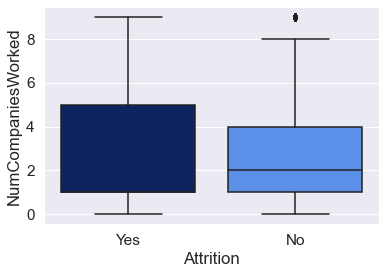

In [172]:
sns.boxplot(y='NumCompaniesWorked',x='Attrition',data=df, palette=['#001d6c','#4589ff'], color='black')

##### Edad

Con relación a la edad de los empleados, podemos concluir que los empleados más jovenes tienen 20 años mientras que los más ancianos tienen 60 años. Además, la mayor concentración de empleados está entre los 30 y los 45 años de edad. También se ve una ligera tenedencia que los más jovenes abandonen sus trabajos más que los más ancianos.

/Users/leticiamazarinmolina/opt/miniconda3/envs/the_bridge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

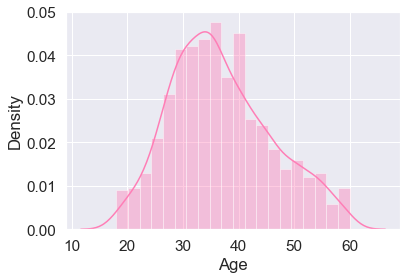

In [173]:
sns.distplot(df['Age'],hist=True,bins=20, color='#ff7eb6')

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

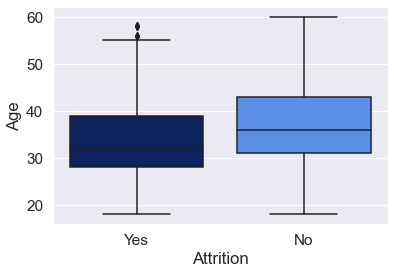

In [174]:
sns.boxplot(y='Age',x='Attrition',data=df, palette=['#001d6c','#4589ff'], color='black')

##### Distancia de casa

La mayoría de los empleados parece vivir cerca del trabajo.

También es posible ver, en el diagrama de caja que la media de la distancia del trabajo de los empleados que abandanaron sus puestos es más alta de la media de los que no abandonaron. 

/Users/leticiamazarinmolina/opt/miniconda3/envs/the_bridge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

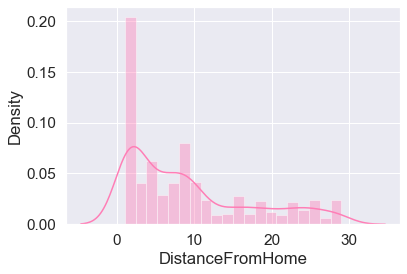

In [175]:
sns.distplot(df['DistanceFromHome'],hist=True,bins=20, color='#ff7eb6')

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

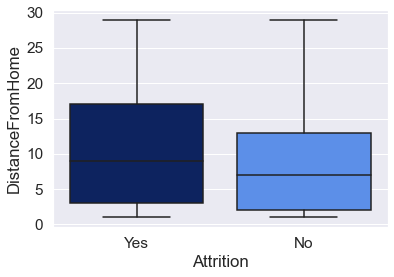

In [108]:
sns.boxplot(y='DistanceFromHome',x='Attrition',data=df, palette=['#001d6c','#4589ff'], color='black')

##### Sueldos

Podemos ver que la mayoría de los empleados tienen sueldos mensuales de entre 2.500 y 5.000. También es posible conluir, al mirar el diagrama de cajas, que la media de los sueldos mensuales de los empleados que abandonan es más baja que la media de los que no abandonan. 

Vemos que en 'Monthly income' hay outliers que pueden impactar el modelo. Los outliers pueden sesgar las medidas estadísticas y las distribuciones de datos, proporcionando una representación engañosa de los datos y las relaciones subyacentes. La eliminación de estos valores antes del modelado puede dar como resultado un mejor ajuste de los datos y, a su vez, predicciones más hábiles.

Se verá más adelante que la variable de sueldos ('MontlyIncome') está muy correlacionada con otras variables como el nivel del puesto de trabajo o el hecho de que alguien sea Director. Además, como vemos que contamos con outliers en esa variable, se optará por eliminarla del modelo para facilitar el analisis. 



/Users/leticiamazarinmolina/opt/miniconda3/envs/the_bridge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

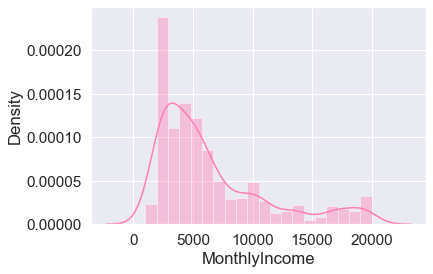

In [109]:
sns.distplot(df['MonthlyIncome'],hist=True,bins=20, color='#ff7eb6')

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

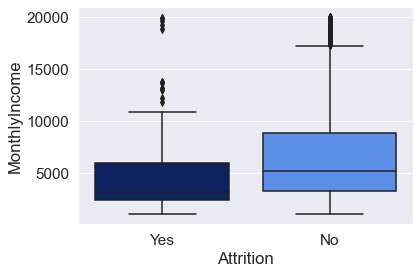

In [110]:
sns.boxplot(y='MonthlyIncome',x='Attrition',data=df, palette=['#001d6c','#4589ff'])

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

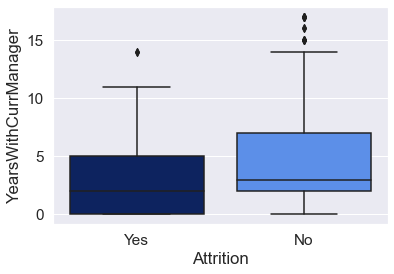

In [111]:
sns.boxplot(y='YearsWithCurrManager',x='Attrition',data=df, palette=['#001d6c','#4589ff'])

##### Años con el mismo Manager

/Users/leticiamazarinmolina/opt/miniconda3/envs/the_bridge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

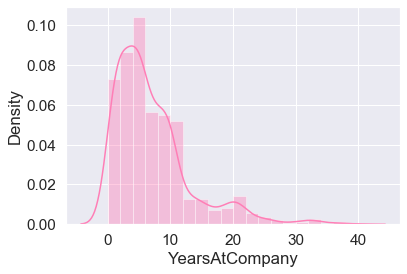

In [112]:
sns.distplot(df['YearsAtCompany'],hist=True,bins=20, color='#ff7eb6')

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

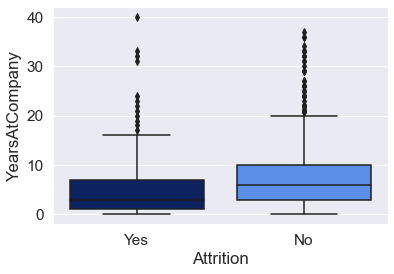

In [113]:
sns.boxplot(y='YearsAtCompany',x='Attrition',data=df, palette=['#001d6c','#4589ff'])

Aquí también podemos ver la presencia de muchos outliers para esa variable.

## 3. Transformación de los datos para el modelo

In [176]:
df_ = df.copy()

Eliminamos columnas que consideramos que no servirán para el modelo, porque vimos ya que no parecen influir en la decisión de renunciar o no el trabajo.

In [177]:
df.drop(['Source_of_Hire', 'Higher_Education', 'Work_accident', 'Department', 'Mode_of_work', 'JobInvolvement', 'JobSatisfaction', 'Absenteeism'], inplace=True, axis=1)

In [178]:
rename_jobrole = {
    'Laboratory Technician': 'Lab_Technician', 
    'Research Scientist': 'Scientist',
    'Research Director': 'Director',
    'Sales Representative': 'Sales_Rep',
    'Sales Executive': 'Sales_Executive',
    'Manager': 'Manager',
    'Manufacturing Director': 'Director',
    'Healthcare Representative': 'Healthcare_Rep',
    'Human Resources': 'HR'
}

df.replace(rename_jobrole, inplace=True)

In [179]:
df = pd.get_dummies(df,columns=['Attrition',
'BusinessTravel',
 'JobRole',
 'Gender',
 'MaritalStatus',
 'OverTime',
 'Job_mode',
 'Status_of_leaving'], 
 drop_first=True)

In [180]:
df.columns

Index(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Leaves', 'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'JobRole_HR', 'JobRole_Healthcare_Rep',
       'JobRole_Lab_Technician', 'JobRole_Manager', 'JobRole_Sales_Executive',
       'JobRole_Sales_Rep', 'JobRole_Scientist', 'Gender_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'Job_mode_FullTime', 'Job_mode_Part Time',
       'Status_of_leaving_Dept.Head', 'Status_of_leaving_Salary',
       'Status_of_leaving_Work Accident',
       'Status_of_leaving_Work Environment'],
      dtype='object')

In [182]:
rename_columns={
    'Attrition_Yes': 'Attrition',
    'BusinessTravel_Travel_Frequently': 'Frequently_Travel',
    'BusinessTravel_Travel_Rarely': 'Rarely_Travel',
    'Gender_Male': 'Male',
    'MaritalStatus_Married': 'Married',
    'MaritalStatus_Single': 'Single',
    'OverTime_Yes': 'OverTime',
    'Status_of_leaving_Dept.Head': 'Leaving_DeptHead',
    'Status_of_leaving_Salary': 'Leaving_Salary',
    'Status_of_leaving_Work Accident': 'Leaving_Accident',
    'Status_of_leaving_Work Environment': 'Leaving_Environment',
    'JobRole_Lab_Technician': 'Lab_Technician', 
    'JobRole_Scientist': 'Scientist',
    'JobRole_Director': 'Director',
    'JobRole_Sales_Rep': 'Sales_Rep',
    'JobRole_Sales_Executive': 'Sales_Executive',
    'JobRole_Manager': 'Manager',
    'JobRole_Healthcare_Rep': 'Healthcare_Rep',
    'JobRole_HR': 'HR',
    'Job_mode_FullTime': 'FullTime',
    'Job_mode_Part Time': 'PartTime'
}

df.rename(columns = rename_columns, inplace = True)


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DistanceFromHome         1470 non-null   int64
 2   JobLevel                 1470 non-null   int64
 3   MonthlyIncome            1470 non-null   int64
 4   NumCompaniesWorked       1470 non-null   int64
 5   PercentSalaryHike        1470 non-null   int64
 6   PerformanceRating        1470 non-null   int64
 7   StockOptionLevel         1470 non-null   int64
 8   TotalWorkingYears        1470 non-null   int64
 9   TrainingTimesLastYear    1470 non-null   int64
 10  YearsAtCompany           1470 non-null   int64
 11  YearsSinceLastPromotion  1470 non-null   int64
 12  YearsWithCurrManager     1470 non-null   int64
 13  Leaves                   1470 non-null   int64
 14  Attrition                1470 non-null   uint8
 15  Freq

In [184]:
corr_matrix = df.corr() 
(corr_matrix['Attrition'].sort_values(ascending = False))

Attrition                  1.000000
OverTime                   0.246118
Single                     0.175419
Sales_Rep                  0.157234
Frequently_Travel          0.115143
Lab_Technician             0.098290
DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
Leaving_Accident           0.042352
HR                         0.036215
Male                       0.029453
Sales_Executive            0.019774
Leaving_Salary             0.018965
FullTime                   0.014129
PerformanceRating          0.002889
Scientist                 -0.000360
PercentSalaryHike         -0.013478
Leaving_Environment       -0.017456
Leaving_DeptHead          -0.020873
YearsSinceLastPromotion   -0.033019
Leaves                    -0.041820
Rarely_Travel             -0.049538
PartTime                  -0.055250
TrainingTimesLastYear     -0.059478
Healthcare_Rep            -0.078696
Manager                   -0.083316
Married                   -0.090984
YearsAtCompany            -0

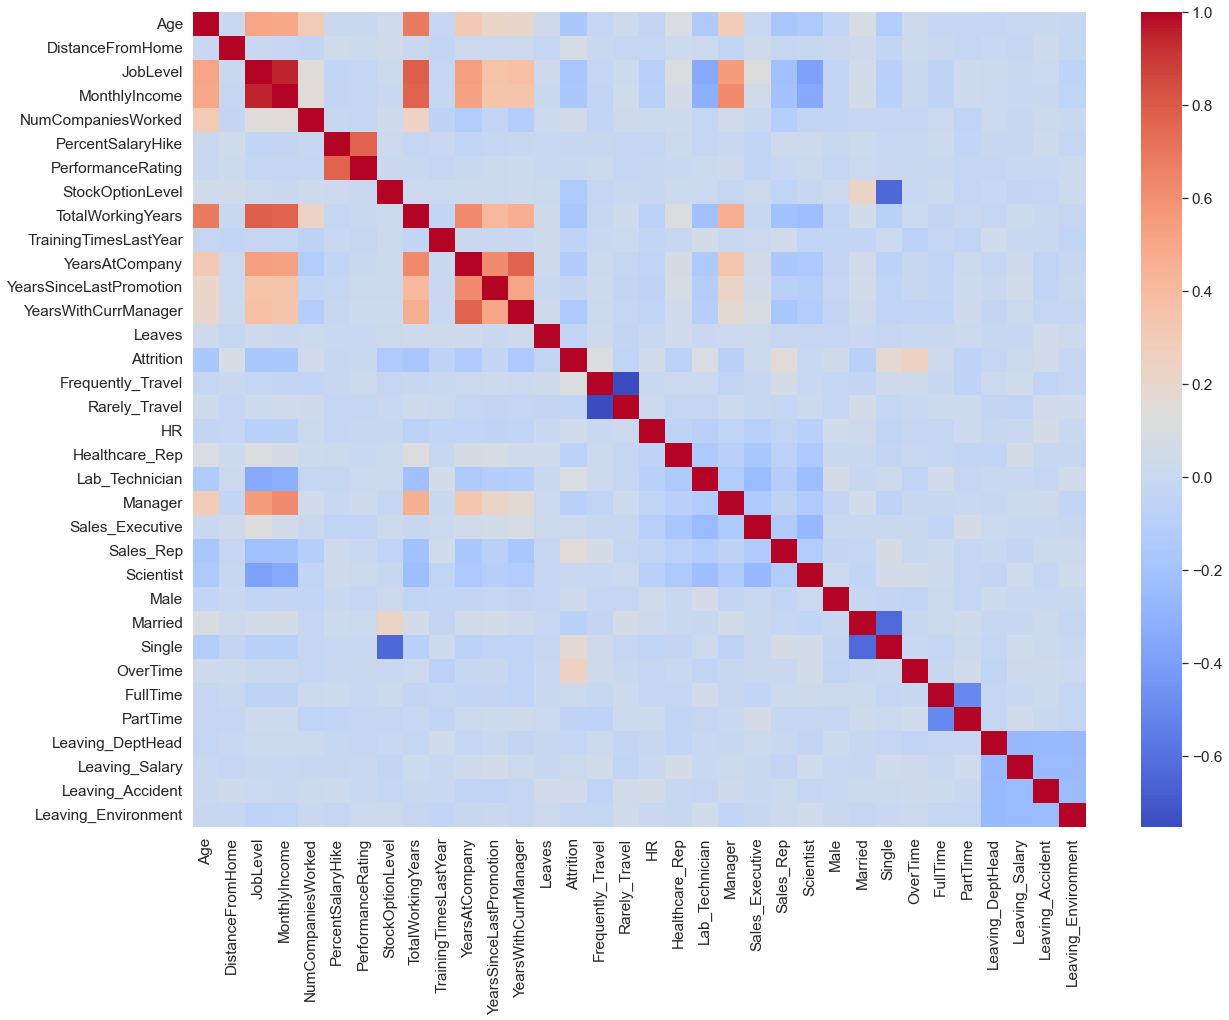

<Figure size 432x288 with 0 Axes>

In [185]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')
plt.show()
plt.savefig(f'{os.getcwd()}/UTILS/Images/corr_matrix_1.png',transparent=True)

Vemos que algunas variables tienen una correlación muy alta como:
- 'Monthly Income' y 'JobLevel'
- 'Total working years' y 'Age'
- 'Total working years' y 'JobRole'
- 'Total working years' y 'Monthly Income'
- 'Year with current Manager' y 'Years at company'

In [186]:
df_1 = df.drop(['PerformanceRating','YearsAtCompany', 'MonthlyIncome', 'NumCompaniesWorked'], axis=1)

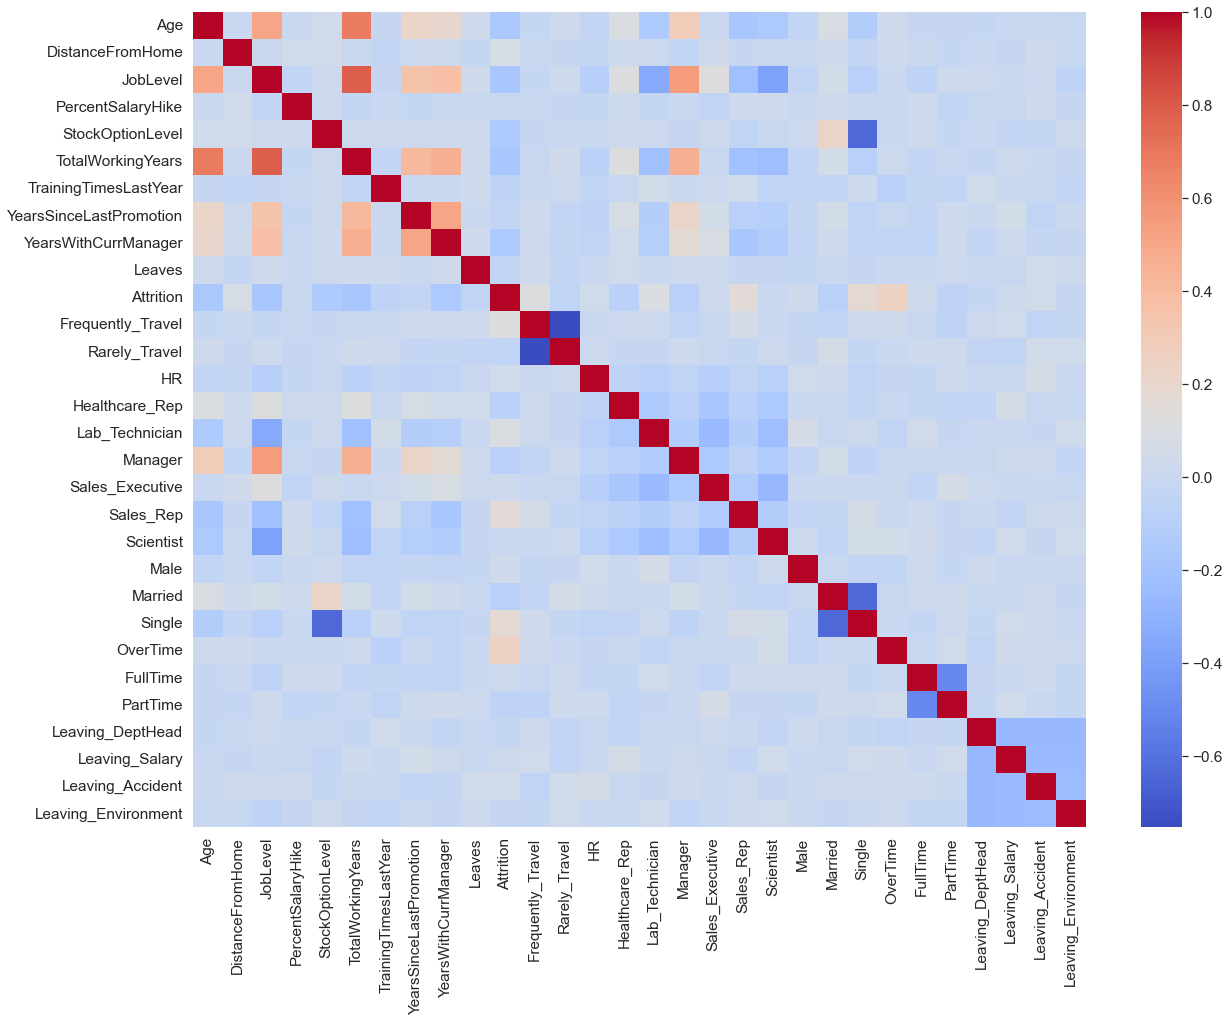

<Figure size 432x288 with 0 Axes>

In [187]:
plt.figure(figsize = (20,15))
sns.heatmap(df_1.corr(), annot = False, cmap = 'coolwarm')
plt.show()
plt.savefig(f'{os.getcwd()}/UTILS/Images/corr_matrix_2.png',transparent=True)

In [188]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DistanceFromHome         1470 non-null   int64
 2   JobLevel                 1470 non-null   int64
 3   PercentSalaryHike        1470 non-null   int64
 4   StockOptionLevel         1470 non-null   int64
 5   TotalWorkingYears        1470 non-null   int64
 6   TrainingTimesLastYear    1470 non-null   int64
 7   YearsSinceLastPromotion  1470 non-null   int64
 8   YearsWithCurrManager     1470 non-null   int64
 9   Leaves                   1470 non-null   int64
 10  Attrition                1470 non-null   uint8
 11  Frequently_Travel        1470 non-null   uint8
 12  Rarely_Travel            1470 non-null   uint8
 13  HR                       1470 non-null   uint8
 14  Healthcare_Rep           1470 non-null   uint8
 15  Lab_

In [189]:
# después de tratar los datos, guardamos ese documento para empezar a analizarlos.
try:
    os.mkdir(f'{os.getcwd()}/DATA/processed/')
except:
    print('Directory already exists')

df_1.to_csv(f'{os.getcwd()}/DATA/processed/Attrition_processed.csv', index=False)

Directory already exists


## 4. Separamos los datos

In [190]:
# Importamos el dataset procesado

file = 'Attrition_processed.csv'
df_processed = import_df(f'{os.getcwd()}/DATA/processed/', file)

In [191]:
# Separamos el dataset en features (X) y variable target (y)
X = df_processed.drop('Attrition', axis = 1)
y = df_processed['Attrition']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

## 5. Creamos los modelos

Se ha optado por crear distintos modelos de predicción de clasificación para encontrar el que llegue a los mejores resultados.

Los modelos son:
- Logistic Regression
- Decision Trees
- Random Forest
- KNN

Los parametros utilizados para medir los modelos son:
- Acuracy
- F1 Score

Para empezar, crearemos los modelos con el dataset original para ver que resultados obetenemos. Después se optará por realizar un oversampling, ya que al tener el dataset con una distribución de la variable target muy desequilibrada, los modelos creados sin el oversampling presentarán muchos sesgos.

### Regresión Logística

In [193]:
# Entrenamos el modelo
model_log = LogisticRegression(random_state=1234)
model_log_fit = model_log.fit(X_train,y_train)

# Predecimos X_test
y_pred_log = model_log_fit.predict(X_test)

# Miramos los parámetros del modelo
print(f'Acurracy Score: {accuracy_score(y_test, y_pred_log)}')
print(f'F1 Score: {f1_score(y_test, y_pred_log)}')
print('Complete Classification Report:')
print(classification_report(y_test, y_pred_log))

Acurracy Score: 0.8877551020408163
F1 Score: 0.4761904761904762
Complete Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       250
           1       0.79      0.34      0.48        44

    accuracy                           0.89       294
   macro avg       0.84      0.66      0.71       294
weighted avg       0.88      0.89      0.87       294



/Users/leticiamazarinmolina/opt/miniconda3/envs/the_bridge/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


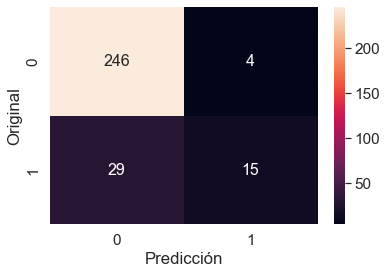

In [194]:
plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, y_pred_log), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Original')
plt.show()

### Decision Trees

In [195]:
tree = DecisionTreeClassifier(max_depth=10, random_state=1234)
tree_fit = tree.fit(X_train,y_train)
y_pred_tree = tree_fit.predict(X_test)
print(f'Score: {tree_fit.score(X_test, y_test)}')
print(f'F1 Score: {f1_score(y_test, y_pred_tree)}')
print('Complete Classification Report:')
print(classification_report(y_test, y_pred_tree))

Score: 0.7653061224489796
F1 Score: 0.27368421052631586
Complete Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       250
           1       0.25      0.30      0.27        44

    accuracy                           0.77       294
   macro avg       0.56      0.57      0.57       294
weighted avg       0.78      0.77      0.77       294



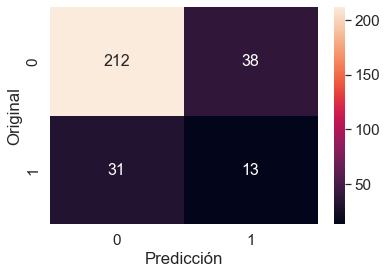

In [196]:
plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, y_pred_tree), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Original')
plt.show()

### Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10, criterion='entropy',random_state=1234)
model_rf_fit = model_rf.fit(X_train, y_train)

predicted_rf = model_rf_fit.predict(X_test)
randfor_score = round(model_rf_fit.score(X_train,y_train) * 100, 2)
print(f'Score: {randfor_score}')
print(f'F1 Score: {f1_score(y_test, predicted_rf)}')
print('Complete Classification Report:')
print(classification_report(y_test, predicted_rf))

Score: 99.15
F1 Score: 0.3333333333333333
Complete Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       250
           1       0.62      0.23      0.33        44

    accuracy                           0.86       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.84      0.86      0.84       294



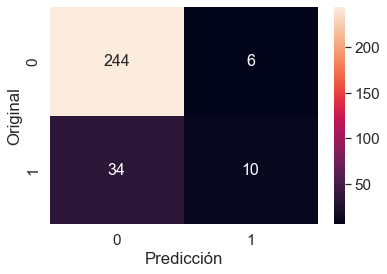

In [198]:
plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, predicted_rf), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Original')
plt.show()

### KNN

In [199]:
model_knn = KNeighborsClassifier(4)
model_knn_fit = model_knn.fit(X_train, y_train)
predicted_knn = model_knn_fit.predict(X_test)
knn_score = round(model_knn_fit.score(X_train,y_train) * 100, 2)
print(f'Score: {knn_score}')
print(f'F1 Score: {f1_score(y_test, predicted_knn)}')
print('Complete Classification Report:')
print(classification_report(y_test, predicted_knn))

Score: 85.29
F1 Score: 0.11538461538461538
Complete Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       250
           1       0.38      0.07      0.12        44

    accuracy                           0.84       294
   macro avg       0.62      0.52      0.51       294
weighted avg       0.78      0.84      0.79       294



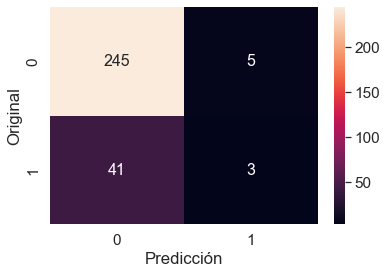

In [200]:
plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, predicted_knn), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Original')
plt.show()

## 6. Probamos Oversampling

Como el dataset no estaba bien distribuido, hemos que los modelos no consiguen predecir bien los casos en los que hay abandono.

Esto ocurre porque hay pocos casos en los que la variable 'Attrition' es 1 y acaba generando sesgos en el modelo. 

Para tratar estos sesgos y mejorar los modelos, se realizará un 'resampling' del dataset, o sea, duplicaremsos las columnas de Attrition 1 para conseguir subir la distribución de un 16% a un 40% del dataset.

In [201]:
sm = SMOTE(sampling_strategy=0.40)
X_train_res, y_train_res = sm.fit_resample(X, y)

In [202]:
print('Before OverSampling, the shape of train_X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape)) 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

Before OverSampling, the shape of train_X: (1470, 29)
Before OverSampling, the shape of train_y: (1470,) 

After OverSampling, the shape of train_X: (1726, 29)
After OverSampling, the shape of train_y: (1726,)


### Regresión Logística con Oversampling

In [203]:
log_res = model_log.fit(X_train_res,y_train_res)
y_pred_log_res = log_res.predict(X_test)
y_pred_log_res

print(f'Score: {log_res.score(X_test, y_test)}')
print(f'F1 Score: {f1_score(y_test, y_pred_log_res)}')
print('Complete Classification Report:')
print(classification_report(y_test, y_pred_log_res))

Score: 0.8945578231292517
F1 Score: 0.6265060240963856
Complete Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       250
           1       0.67      0.59      0.63        44

    accuracy                           0.89       294
   macro avg       0.80      0.77      0.78       294
weighted avg       0.89      0.89      0.89       294



/Users/leticiamazarinmolina/opt/miniconda3/envs/the_bridge/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


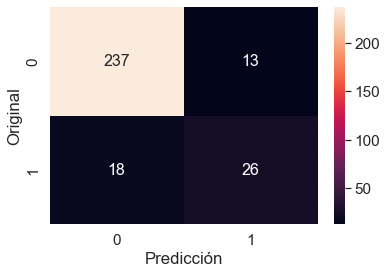

In [204]:
plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, y_pred_log_res), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Original')
plt.show()

### Decision Tree con Oversampling

In [205]:
tree_fit_res = tree.fit(X_train_res,y_train_res)
y_pred_tree_res = tree_fit_res.predict(X_test)
print(f'Score: {tree_fit_res.score(X_test, y_test)}')
print(f'F1 Score: {f1_score(y_test, y_pred_tree_res)}')
print('Complete Classification Report:')
print(classification_report(y_test, y_pred_tree_res))

Score: 0.9829931972789115
F1 Score: 0.942528735632184
Complete Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       250
           1       0.95      0.93      0.94        44

    accuracy                           0.98       294
   macro avg       0.97      0.96      0.97       294
weighted avg       0.98      0.98      0.98       294



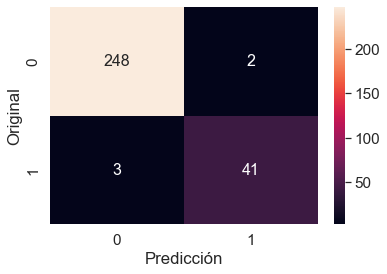

In [206]:
plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, y_pred_tree_res), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Original')
plt.show()

### Random Forest con Oversampling

In [207]:
rf_fit_res = model_rf.fit(X_train_res, y_train_res)
predicted_rf_res = rf_fit_res.predict(X_test)
randfor_score_res = round(rf_fit_res.score(X_train_res,y_train_res) * 100, 2)
print(f'Score: {randfor_score_res}')
print(f'F1 Score: {f1_score(y_test, predicted_rf_res)}')
print('Complete Classification Report:')
print(classification_report(y_test, predicted_rf_res))

Score: 98.61
F1 Score: 0.9662921348314608
Complete Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       250
           1       0.96      0.98      0.97        44

    accuracy                           0.99       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.99      0.99      0.99       294



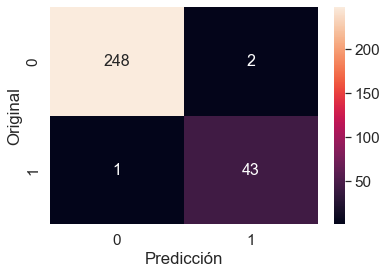

In [208]:
plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, predicted_rf_res), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Original')
plt.show()

### KNN con Oversampling

In [209]:
knn_fit_res = model_knn.fit(X_train_res, y_train_res)
predicted_knn_res = knn_fit_res.predict(X_test)
knn_score_res = round(knn_fit_res.score(X_train_res,y_train_res) * 100, 2)
print(f'Score: {knn_score_res}')
print(f'F1 Score: {f1_score(y_test, predicted_knn_res)}')
print('Complete Classification Report:')
print(classification_report(y_test, predicted_knn_res))

Score: 90.38
F1 Score: 0.6818181818181818
Complete Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       250
           1       0.68      0.68      0.68        44

    accuracy                           0.90       294
   macro avg       0.81      0.81      0.81       294
weighted avg       0.90      0.90      0.90       294



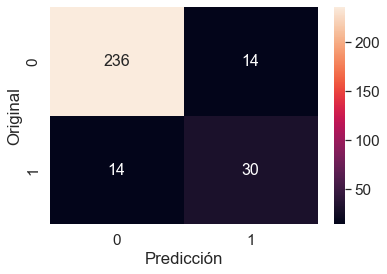

In [210]:
plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, predicted_knn_res), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Original')
plt.show()

## 6. Conclusión

Después de crear los modelos y comparar los resultados entre ellos con y sin el Oversampling, es posible concluir que los dos mejores modelos son Decision Tree y Random Forest. 

Los principales parámetros que observamos son:
- Accuracy - indica cómo de correcto ha sido el modelo en general. Podemos ver en todos los modelos (con y sin oversampling) un alto nivel de precisión general. Pero esto se da porque el modelo es bueno en predecir los casos en los que no hay abandono de los puestos de trabajo simplemente porque el dataset contiene muchos más casos en los que la variable target es 0 (o sea, en casos en los que precisamente no hay abandono del puesto de trabajo). Para confirmar esto, miramos otros parámetros como el recall y precision.
- Precision - indica cómo de bueno es el modelo en predecir una categoría específica. Aquí ya vemos que los modelos, cuando no cuentan con el recurso del oversampling aplicado después del primer intento, tienen alto nivel de precisión para los casos en los que el resultado es 0 y bajo para los casos en los que el resultado es 1.
- Recall - indica cómo de bueno es el modelo en detectar una categoría específica. De nuevo, los modelos sin oversampling presentan alto recall para la categoría 0 y bajo recall para la categoría 1.
- F1 Score - es la combinación de precision y recall.

Como el objetivo del modelo debe ser justamente anteciparnos a los casos en los que sí habrá abandono del puesto de trabajo (Attrition = 1), necesitamos mejorar el precision y recall para esa categoría. Hemos detectado que, al haber una distribución desequilibrada entre las dos categorías, el modelo presentaba sesgos y predecía mucho mejor los casos en los que attrition era 0. Para tratar estos sesgos, se ha optado por realizar un resampling, duplicando algunos de los casos en los que attrition era 1 para llegar a una distribución de 40% de datos iguales a 1 y 60% de datos iguagles a 0.

Después del resampling, es posible identificar una mejora en los resultados de todos los modelos. Se ha elegido el modelo Random Forest ya que ofrece los mejores resultados llegando a 

In [211]:
filename = 'My_Model_pickle_model_rf.pkl'
with open(f'{os.getcwd()}/MODEL/{filename}', 'rb') as file:  
    pickled_model = pickle.load(file)

pickled_model

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, random_state=1234)

0.9829931972789115
0.9438202247191012
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       250
           1       0.93      0.95      0.94        44

    accuracy                           0.98       294
   macro avg       0.96      0.97      0.97       294
weighted avg       0.98      0.98      0.98       294

----


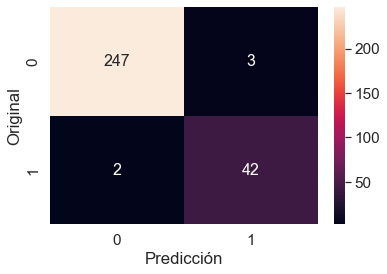

In [212]:
y_pred = pickled_model.predict(X_test)
print(pickled_model.score(X_test, y_test))
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('----')
plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Original')
plt.show()